In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"]+= os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [3]:
df = pd.read_csv('titanic.csv')
df.shape

(887, 8)

In [4]:
# 이름 항목이 유니크한지(동명이인이 없는지) 확인
df.Name.nunique()

887

In [5]:
df = df.set_index('Name')

In [6]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500


In [8]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [9]:
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Siblings', 'Parents', 'Fare']
df.head()

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500


In [10]:
df.Survived.mean() # 38% 생존

0.3855693348365276

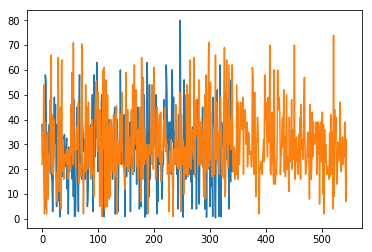

In [12]:
#plt.scatter(df['Age'], df['Survived'])
plt.plot(df[df['Survived']==1]['Age'].values)
plt.plot(df[df['Survived']==0]['Age'].values)

(array([ 63.,  51., 242., 211., 142.,  88.,  49.,  28.,  11.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

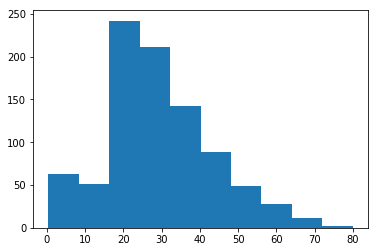

In [15]:
plt.hist(df['Age'].values)

(array([216.,   0., 184.,   0., 487.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. ]),
 <a list of 5 Patch objects>)

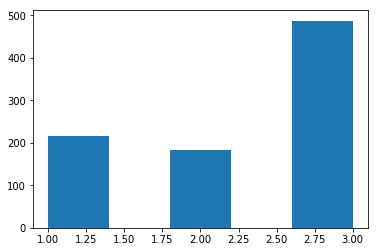

In [17]:
plt.hist(df['Pclass'].values, bins=5)

([<matplotlib.patches.Wedge at 0x25bdfe1e7b8>,
 [Text(-0.48702712164056955, 0.9863085636789849, ''),
  Text(0.4870272139854391, -0.9863085180802108, '')])

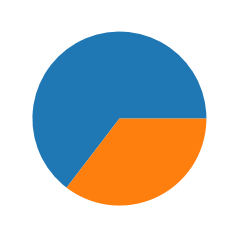

In [20]:
s = df['Sex']
s.value_counts()
plt.pie(s.value_counts())

(array([604., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

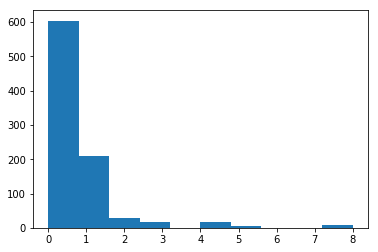

In [22]:
plt.hist(df['Siblings'].values)

(array([ 24.,  18., 140., 146.,  74.,  59.,  42.,  18.,  17.,   7.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <a list of 10 Patch objects>)

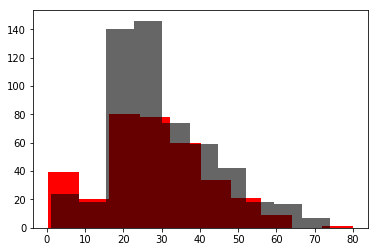

In [28]:
# 연령별 생존비율
plt.hist(df[df['Survived']==1]['Age'].values, color = 'red')
plt.hist(df[df['Survived']==0]['Age'].values, color = 'black', alpha = 0.6)

(array([ 81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 233.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 10 Patch objects>)

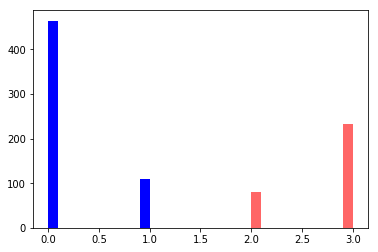

In [34]:
# 성별 생존비율
plt.hist(df[df['Sex']=='male']['Survived'].values, color = 'blue')
plt.hist(df[df['Sex']=='female']['Survived'].values+2, color = 'red', alpha = 0.6)

In [36]:
# 1,2,3 등석은 범주형이다.
df['Pclass'] = df['Pclass'].astype('object')

In [38]:
df.dtypes

Survived      int64
Pclass       object
Sex          object
Age         float64
Siblings      int64
Parents       int64
Fare        float64
dtype: object

In [39]:
data = pd.get_dummies(df)
data.head()

,Survived,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,,
Mr. Owen Harris Braund,0,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,1,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,0,35.0,0,0,8.0500,0,0,1,0,1


In [44]:
X = data.drop(columns='Survived')
y = data['Survived']
X.head()

,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,
Mr. Owen Harris Braund,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,35.0,0,0,8.0500,0,0,1,0,1


In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(X,y)

In [48]:
model.score(X, y)

0.8489289740698985

In [ ]:
df['Survived'].unipue

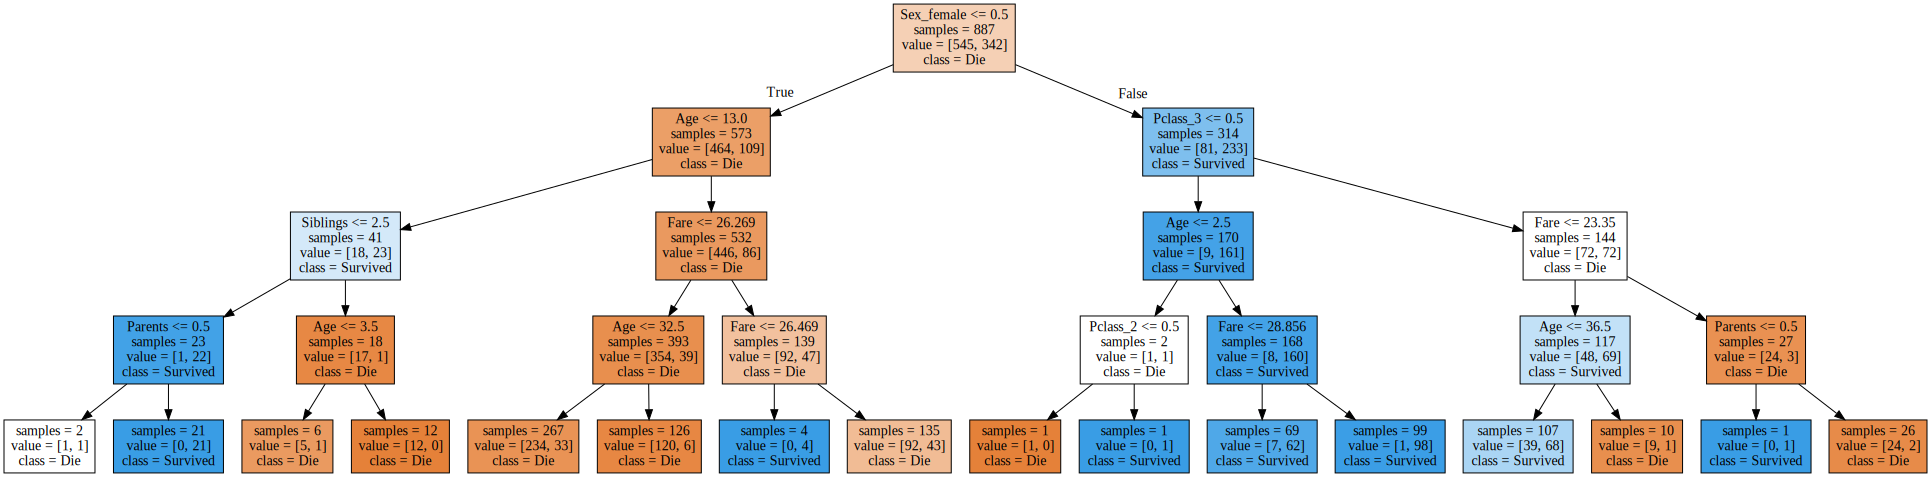

None

In [52]:
export_graphviz(model, out_file='titanic.dot', class_names=['Die','Survived'],
               feature_names=X.columns, impurity=False, filled=True)
with open('titanic.dot') as f:
    dot_graph = f.read()
display(display(graphviz.Source(dot_graph)))

### ================================================

In [53]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [54]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [59]:
# NaN 값이 있다
loans.isna().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not.fully.paid        0
dtype: int64

In [60]:
loans = loans.dropna()
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0.0,0.0,0.0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0.0,0.0,1.0,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0.0,0.0,0.0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1.0,0.0,0.0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1.0,0.0,0.0,0


In [62]:
loans.isna().sum().sum()

0

In [63]:
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [64]:
loans['not.fully.paid'].mean()

0.1598360655737705

In [66]:
# 돈을 빌린 목적
loans.purpose.value_counts()

debt_consolidation    3949
all_other             2290
credit_card           1259
home_improvement       628
small_business         618
major_purchase         432
educational            340
Name: purpose, dtype: int64

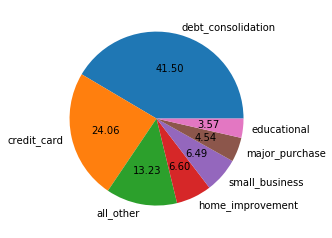

In [68]:
p = plt.pie(loans.purpose.value_counts(), labels = loans.purpose.unique(),
           autopct='%.2f')

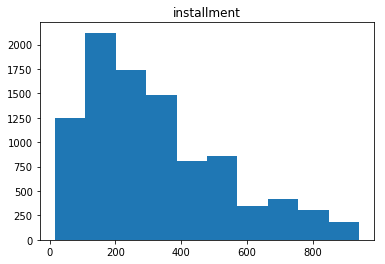

In [70]:
p = plt.hist(loans['installment'])
p = plt.title('installment')

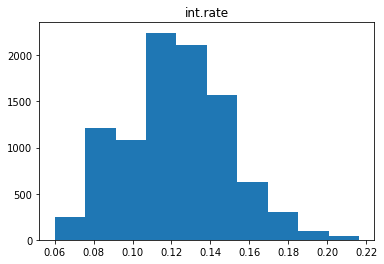

In [71]:
p = plt.hist(loans['int.rate'])
p = plt.title('int.rate')

In [72]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

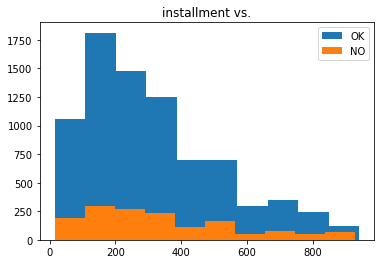

In [73]:
# 데이터[조건]
p = plt.hist(loans['installment'][loans['not.fully.paid']==0], label = 'OK')
p = plt.hist(loans['installment'][loans['not.fully.paid']==1], label = 'NO')
p = plt.title('installment vs.')
p = plt.legend()

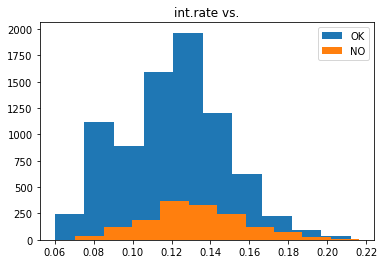

In [74]:
# 데이터[조건]
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==0], label = 'OK')
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==1], label = 'NO')
p = plt.title('int.rate vs.')
p = plt.legend()

In [75]:
# 카테고리를 원핫 인코딩
loans = pd.get_dummies(loans)

In [76]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,0,1,0,0,0,0,0


In [80]:
X = loans.drop(columns='not.fully.paid')
y = loans['not.fully.paid']

In [81]:
model = DecisionTreeClassifier(max_depth=5).fit(X,y)

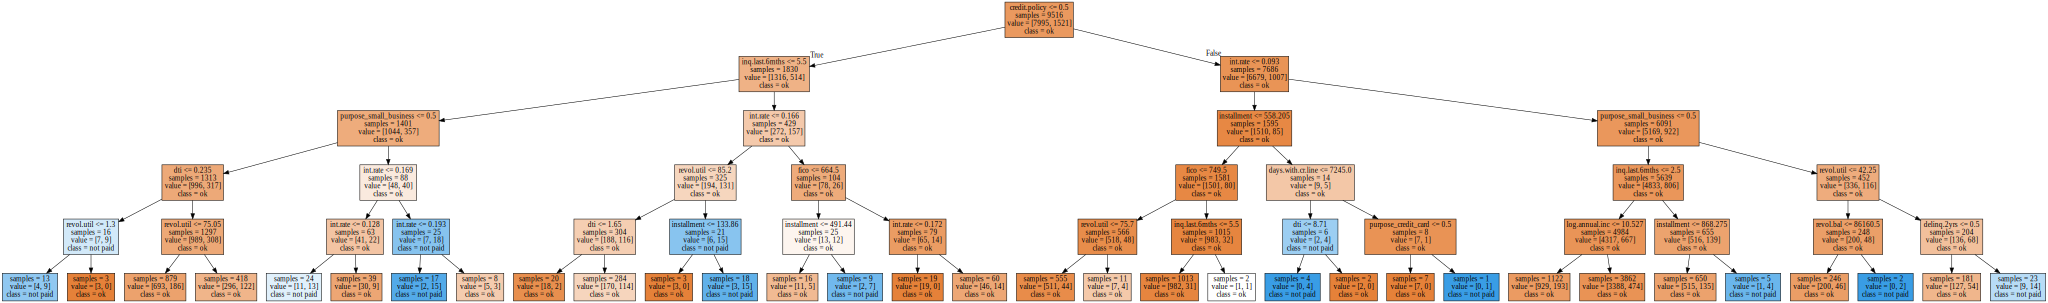

None

In [82]:
export_graphviz(model, out_file='loan.dot', class_names=['ok','not paid'],
               feature_names=X.columns, impurity=False, filled=True)
with open('loan.dot') as f:
    dot_graph = f.read()
display(display(graphviz.Source(dot_graph)))